In [1]:
import doe
import numpy as np
import matplotlib.pyplot as plt

In [2]:
modelspec = doe.model_matrix(name="linear", factors=6)
matrix_of_essais = doe.fracfact("A B C D ABC BCD")
X = doe.x2fx(X=matrix_of_essais, modelspec=modelspec)

Suppose the true model is $y=2+x_1-x_2+2x_4$.

In [5]:
y = 2 + matrix_of_essais[:,0] -  matrix_of_essais[:,1] + 2 *  matrix_of_essais[:,3] + np.random.normal(0, 1, size=(matrix_of_essais.shape[0]))
linearmodel = doe.fitlm(X=matrix_of_essais, y=y, modelspec=modelspec)

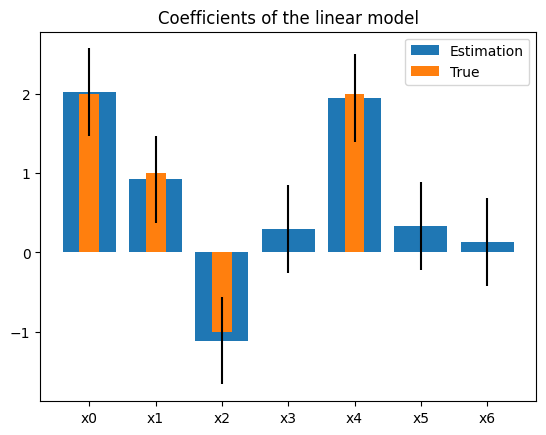

In [9]:
coefs = linearmodel.coefficients
coefs_names = linearmodel.coef_names()

# Computing confidence intervals

y_true = y
y_pred = linearmodel.predict(X=matrix_of_essais)
residues = np.abs(y_true - y_pred)
N = np.shape(matrix_of_essais)[0]
P = np.shape(matrix_of_essais)[1]
s_squared = (residues.T @ residues) / (N - P)
D = np.linalg.inv(X.T @ X)
var_a = D @ np.ones(np.shape(D)[0]) * s_squared
beta = 0.95
alpha = 1 - beta
confidence_interval = doe.t(confidence=alpha/2, dof=N-P) * np.sqrt(np.diag(D) * s_squared)

plt.bar(coefs_names, coefs, label="Estimation")
plt.errorbar(x=coefs_names, y=coefs, yerr=confidence_interval, fmt="k,",)
plt.bar(coefs_names, [2, 1, -1, 0, 2, 0, 0], label="True", alpha=1, width=0.3)
plt.title("Coefficients of the linear model")
plt.legend()

In [173]:
confidence_interval

array([-0.65146006, -0.65146006, -0.65146006, -0.65146006, -0.65146006,
       -0.65146006, -0.65146006])

In [125]:
model_matrix = [
    [1, 0.04, 0.4,-20],
    [1, 0.04, 0.4,  0],
    [1, 0.04, 0.4, 20],
    [1, 0.04, 0.8,  0],
    [1, 0.05, 0.6,  0],
    [1, 0.06, 0.4,  0],
    [1, 0.06, 0.8,  0],
    [1, 0.06, 0.8,  0],
    [1, 0.06, 0.8, 20],
]
model_matrix = np.array(model_matrix)[:,1:]

X = doe.x2fx(model_matrix, "linear")

y = [
    210.31,
    210.37,
    210.28,
    210.18,
    210.31,
    210.81,
    210.70,
    210.58,
    210.67,
]

linearmodel = doe.fitlm(X=model_matrix, y=y, modelspec="linear")
coefficients = linearmodel.coefficients

differential = np.max(model_matrix, axis=0) - np.min(model_matrix, axis=0)

coefficients[1:] * differential * 2